In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Подготовка датасета

In [2]:
iris = load_iris()

In [3]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Посмотрим на размерность

In [4]:
iris_df.shape

(150, 4)

# 2. Обработка данных

#### Посмотрим, присутствуют ли пропущенные значения.

In [7]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

#### Нормализуем данные

In [9]:
scaler = StandardScaler()

iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(iris_scaled, columns=iris.feature_names)
iris_df_scaled.round(2).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.90,1.02,-1.34,-1.32
1,-1.14,-0.13,-1.34,-1.32
2,-1.39,0.33,-1.40,-1.32
3,-1.51,0.10,-1.28,-1.32
4,-1.02,1.25,-1.34,-1.32


# 3. Отбор признаков

#### Используем метод "локтя"

In [10]:
X = iris_df_scaled

In [19]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss

[600.0000000000001,
 222.36170496502302,
 139.82049635974982,
 114.09254690403091,
 90.92751382392049,
 81.54439095511785,
 72.63114382667189,
 62.54060569578125,
 55.119492805290605,
 47.3910351763471]

#### Построим график

Text(0, 0.5, 'WCSS')

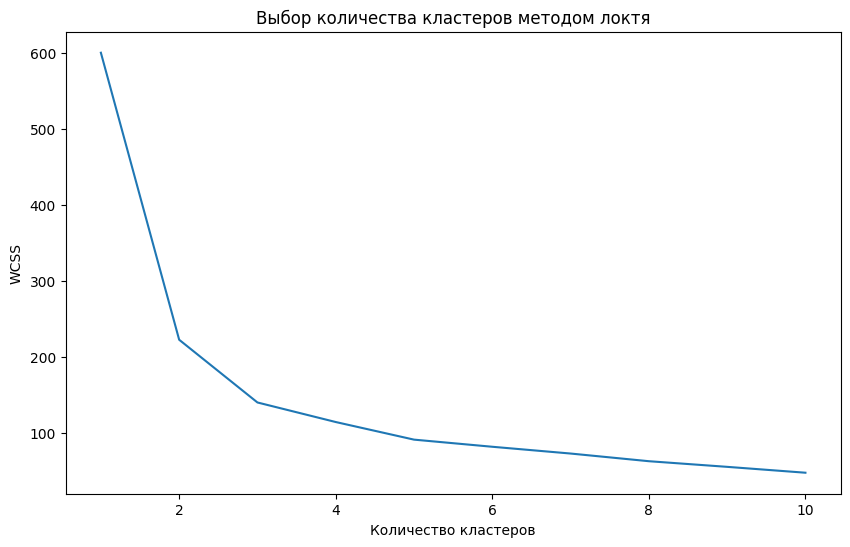

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

# 4. Обучение и оценка качества модели

#### Создадим объект класса нашей модели, используя три кластера в качестве гиперпараметра модели

In [25]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)

In [26]:
y_pred = kmeans.fit_predict(X)

In [27]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

#### Посмотрим на ошибку

In [28]:
kmeans.inertia_

139.82049635974982

#### Визуально оценим результат. Точечная диаграмма целевой переменной

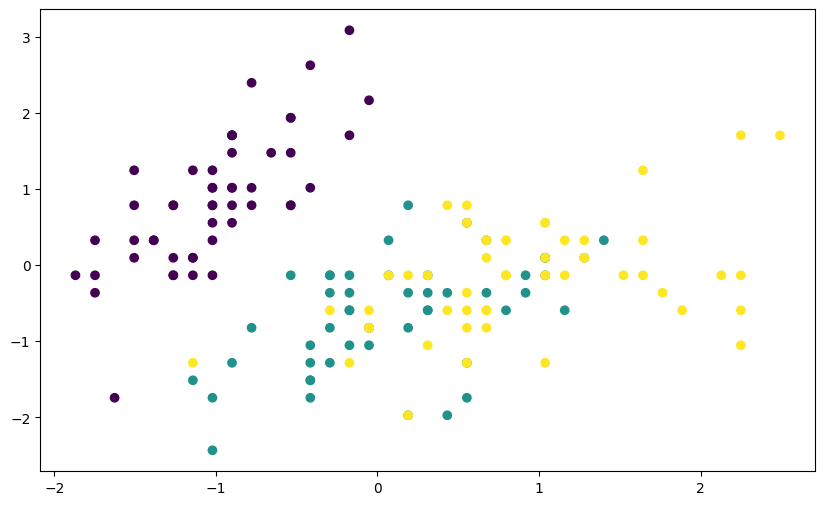

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = iris.target)

#### Точечная диаграмма по предсказанным результатам

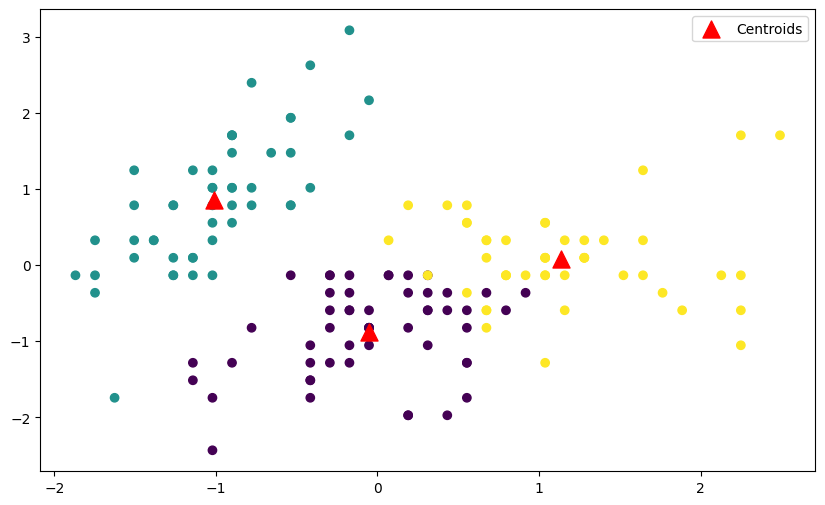

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = y_pred)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], \
            s = 150, c = 'red', marker = '^' , label = 'Centroids')
plt.legend(loc = 'upper right')

In [36]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [37]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Кодировка видов (0, 1, 2) в прогнозном результате не совпадает с целевым!

In [39]:
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        y_pred[i] = 0
    elif y_pred[i] == 0:
        y_pred[i] = 1

#### Точечная диаграмма по предсказанным результатам после замены кодировки видов 

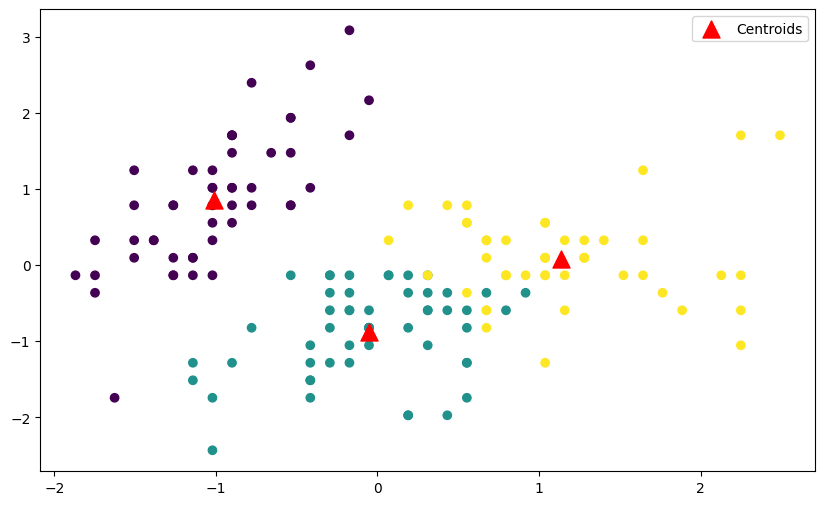

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = y_pred)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], \
            s = 150, c = 'red', marker = '^' , label = 'Centroids')
plt.legend(loc = 'upper right')

#### Оценим качество модели количественно

In [41]:
d = {'Target' : iris.target, 'Prediction' : y_pred}

result = pd.DataFrame(d, columns = ['Target', 'Prediction'])
result.head()

,Target,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


#### Создадим массив Numpy, в котором сравним каждую строчку датафрейма, и если целевая переменная и прогноз совпадают, зададим значение True, в противном случае — False

In [42]:
comparison = np.where(result['Target'] == result['Prediction'], True, False)
print(type(comparison))
print(comparison[:5])

<class 'numpy.ndarray'>
[ True  True  True  True  True]


In [43]:
result['Comparison'] = comparison
result.head()

,Target,Prediction,Comparison
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True


#### Выведем долю совпавших (True) и не совпавших (False) значений.

In [44]:
result['Comparison'].value_counts(normalize = True).round(2)

Comparison
True     0.83
False    0.17
Name: proportion, dtype: float64